In [510]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ignoring warnings

In [511]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

#1. import necessory libraries

In [512]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
import glob
import os
from scipy.interpolate import interp1d
from datetime import datetime, timedelta
from datetime import timedelta
import networkx as nx
from datetime import datetime, timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from sklearn.model_selection import train_test_split

#2. Loading the data

##2.1. Colchester data

In [513]:
folder_path = '/content/drive/MyDrive/university of essex/data science/ds_assignment/data/colchester_data'

combined_data = pd.DataFrame()
file_names = sorted(os.listdir(folder_path))
#merging the files
for file_name in file_names:
  if file_name.endswith('.csv'):
      file_path = os.path.join(folder_path, file_name)
      df = pd.read_csv(file_path)
      #if column is in numeric then it read from next column
      if df.columns[0].isdigit():
          df = pd.read_csv(file_path, header=1)
          # print(file_path,df)
      combined_data = pd.concat([combined_data, df],axis = 0, ignore_index=True)

colchester_data=combined_data
cd = colchester_data

196 colchester files and 188024 rows in data sheet had beed readed which is located in colchester folder

##2.2. Brighton data

In [514]:
folder_path = '/content/drive/MyDrive/university of essex/data science/ds_assignment/data/brighton_data'

combined_data = pd.DataFrame()
file_names = sorted(os.listdir(folder_path))
#merging the files
for file_name in file_names:
  if file_name.endswith('.csv'):
      file_path = os.path.join(folder_path, file_name)
      df = pd.read_csv(file_path)
      #if column is in numeric then it read from next column
      if df.columns[0].isdigit():
          df = pd.read_csv(file_path, header=1)

      combined_data = pd.concat([combined_data, df],axis = 0, ignore_index=True)

brighton_data=combined_data
bd = brighton_data

#Data Exploration

In [515]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188024 entries, 0 to 188023
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   datetime          188024 non-null  object 
 1   temp              187606 non-null  float64
 2   dew               187600 non-null  float64
 3   humidity          187602 non-null  float64
 4   precip            187437 non-null  float64
 5   precipprob        187590 non-null  float64
 6   preciptype        19448 non-null   object 
 7   snow              186478 non-null  float64
 8   snowdepth         186429 non-null  float64
 9   windspeed         187627 non-null  float64
 10  winddir           187595 non-null  float64
 11  sealevelpressure  180462 non-null  float64
 12  cloudcover        184405 non-null  float64
 13  solarradiation    94894 non-null   float64
 14  uvindex           94897 non-null   float64
 15  solarenergy       94908 non-null   float64
dtypes: float64(14), obje

In [516]:
cd.head()

,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy
0,2000-01-01T00:00:00,5.9,5.7,98.63,0.0,0.0,NaN,NaN,NaN,9.4,210.0,1020.6,NaN,NaN,NaN,NaN
1,2000-01-01T01:00:00,6.4,5.8,96.12,0.0,0.0,NaN,NaN,NaN,15.1,233.0,1020.4,100.0,NaN,NaN,NaN
2,2000-01-01T02:00:00,6.6,6.4,98.31,0.0,0.0,NaN,NaN,NaN,13.9,238.0,1020.5,100.0,NaN,NaN,NaN
3,2000-01-01T03:00:00,7.2,6.5,95.92,0.0,0.0,NaN,NaN,NaN,14.1,232.0,1020.5,100.0,NaN,NaN,NaN
4,2000-01-01T04:00:00,7.2,6.6,96.38,0.0,0.0,NaN,NaN,NaN,14.3,242.0,1020.4,100.0,NaN,NaN,NaN


In [517]:
cd.tail()

,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy
188019,2024-01-05T05:00:00,5.2,4.1,92.17,NaN,0.0,NaN,NaN,NaN,27.6,325.0,993.2,100.0,0.0,0.0,0.0
188020,2024-01-05T06:00:00,5.2,4.0,92.40,NaN,0.0,NaN,NaN,NaN,29.6,317.0,993.5,96.6,0.0,0.0,0.0
188021,2024-01-05T07:00:00,5.5,4.0,89.64,NaN,0.0,NaN,NaN,NaN,28.1,308.0,994.5,95.8,0.0,0.0,0.0
188022,2024-01-05T08:00:00,5.8,4.1,88.93,NaN,0.0,NaN,NaN,NaN,27.9,313.0,996.1,91.8,0.0,0.0,0.0
188023,2024-01-05T09:00:00,6.0,4.2,88.83,NaN,0.0,NaN,NaN,NaN,27.5,311.0,996.9,92.3,8.0,0.0,0.0


getting minimum and maximum date and time values

In [518]:
print(cd['datetime'].min(), cd['datetime'].max())

2000-01-01T00:00:00 2024-01-05T09:00:00


Changing date time datatype

In [519]:
print(cd.loc[288, 'datetime'])

2000-01-13T00:00:00


In [520]:
cd['datetime'] = pd.to_datetime(cd['datetime'], format='ISO8601', dayfirst=True)
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188024 entries, 0 to 188023
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   datetime          188024 non-null  datetime64[ns]
 1   temp              187606 non-null  float64       
 2   dew               187600 non-null  float64       
 3   humidity          187602 non-null  float64       
 4   precip            187437 non-null  float64       
 5   precipprob        187590 non-null  float64       
 6   preciptype        19448 non-null   object        
 7   snow              186478 non-null  float64       
 8   snowdepth         186429 non-null  float64       
 9   windspeed         187627 non-null  float64       
 10  winddir           187595 non-null  float64       
 11  sealevelpressure  180462 non-null  float64       
 12  cloudcover        184405 non-null  float64       
 13  solarradiation    94894 non-null   float64       
 14  uvin

changing datatime as index

In [521]:
cd.set_index('datetime', inplace=True) # note we can only run this once, as it will delete the 'date' column.
cd.head()

,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy
datetime,,,,,,,,,,,,,,,
2000-01-01 00:00:00,5.9,5.7,98.63,0.0,0.0,NaN,NaN,NaN,9.4,210.0,1020.6,NaN,NaN,NaN,NaN
2000-01-01 01:00:00,6.4,5.8,96.12,0.0,0.0,NaN,NaN,NaN,15.1,233.0,1020.4,100.0,NaN,NaN,NaN
2000-01-01 02:00:00,6.6,6.4,98.31,0.0,0.0,NaN,NaN,NaN,13.9,238.0,1020.5,100.0,NaN,NaN,NaN
2000-01-01 03:00:00,7.2,6.5,95.92,0.0,0.0,NaN,NaN,NaN,14.1,232.0,1020.5,100.0,NaN,NaN,NaN
2000-01-01 04:00:00,7.2,6.6,96.38,0.0,0.0,NaN,NaN,NaN,14.3,242.0,1020.4,100.0,NaN,NaN,NaN


##converting all the columns to float

checking if there is anythig apart from rain, snow, snowrain, rainsnow

In [522]:
for i in range(len(cd['preciptype'])):
  if cd.iloc[i,5] != 'snow' and cd.iloc[i,5] != 'rain' and cd.iloc[i,5] != 'snow,rain' and cd.iloc[i,5] != 'rain,snow' and pd.notna(cd.iloc[i,5]):
    print(f'{i} : {cd.iloc[i,6]}')

In [523]:
preciptype_mapping = {'rain': 1,'snow': 2, 'snow,rain': 4, 'rain,snow':3}#giving values for rain, snow, snowrain, rainsnow
cd['preciptype'] = cd['preciptype'].map(preciptype_mapping).fillna(cd['preciptype'])

In [524]:
cd.head(10)

,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy
datetime,,,,,,,,,,,,,,,
2000-01-01 00:00:00,5.9,5.7,98.63,0.000,0.0,NaN,NaN,NaN,9.4,210.0,1020.6,NaN,NaN,NaN,NaN
2000-01-01 01:00:00,6.4,5.8,96.12,0.000,0.0,NaN,NaN,NaN,15.1,233.0,1020.4,100.0,NaN,NaN,NaN
2000-01-01 02:00:00,6.6,6.4,98.31,0.000,0.0,NaN,NaN,NaN,13.9,238.0,1020.5,100.0,NaN,NaN,NaN
2000-01-01 03:00:00,7.2,6.5,95.92,0.000,0.0,NaN,NaN,NaN,14.1,232.0,1020.5,100.0,NaN,NaN,NaN
2000-01-01 04:00:00,7.2,6.6,96.38,0.000,0.0,NaN,NaN,NaN,14.3,242.0,1020.4,100.0,NaN,NaN,NaN
2000-01-01 05:00:00,7.5,6.8,95.85,0.000,0.0,NaN,NaN,NaN,14.1,270.0,1021.3,100.0,NaN,NaN,NaN
2000-01-01 06:00:00,8.0,7.3,95.37,0.044,100.0,1.0,NaN,NaN,11.9,290.0,1021.7,100.0,NaN,NaN,NaN
2000-01-01 07:00:00,8.0,7.3,95.22,0.000,0.0,NaN,NaN,NaN,10.6,300.0,1022.6,100.0,NaN,NaN,NaN
2000-01-01 08:00:00,7.6,7.2,97.35,0.000,0.0,NaN,NaN,NaN,12.3,308.0,1023.5,90.0,NaN,NaN,NaN


In [525]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188024 entries, 2000-01-01 00:00:00 to 2024-01-05 09:00:00
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   temp              187606 non-null  float64
 1   dew               187600 non-null  float64
 2   humidity          187602 non-null  float64
 3   precip            187437 non-null  float64
 4   precipprob        187590 non-null  float64
 5   preciptype        19448 non-null   float64
 6   snow              186478 non-null  float64
 7   snowdepth         186429 non-null  float64
 8   windspeed         187627 non-null  float64
 9   winddir           187595 non-null  float64
 10  sealevelpressure  180462 non-null  float64
 11  cloudcover        184405 non-null  float64
 12  solarradiation    94894 non-null   float64
 13  uvindex           94897 non-null   float64
 14  solarenergy       94908 non-null   float64
dtypes: float64(15)
memory usage: 23.0 

checking if there is any null values

In [526]:
print(cd.isna().any())

temp                True
dew                 True
humidity            True
precip              True
precipprob          True
preciptype          True
snow                True
snowdepth           True
windspeed           True
winddir             True
sealevelpressure    True
cloudcover          True
solarradiation      True
uvindex             True
solarenergy         True
dtype: bool


plotting for temperature to check any missing data is there in data

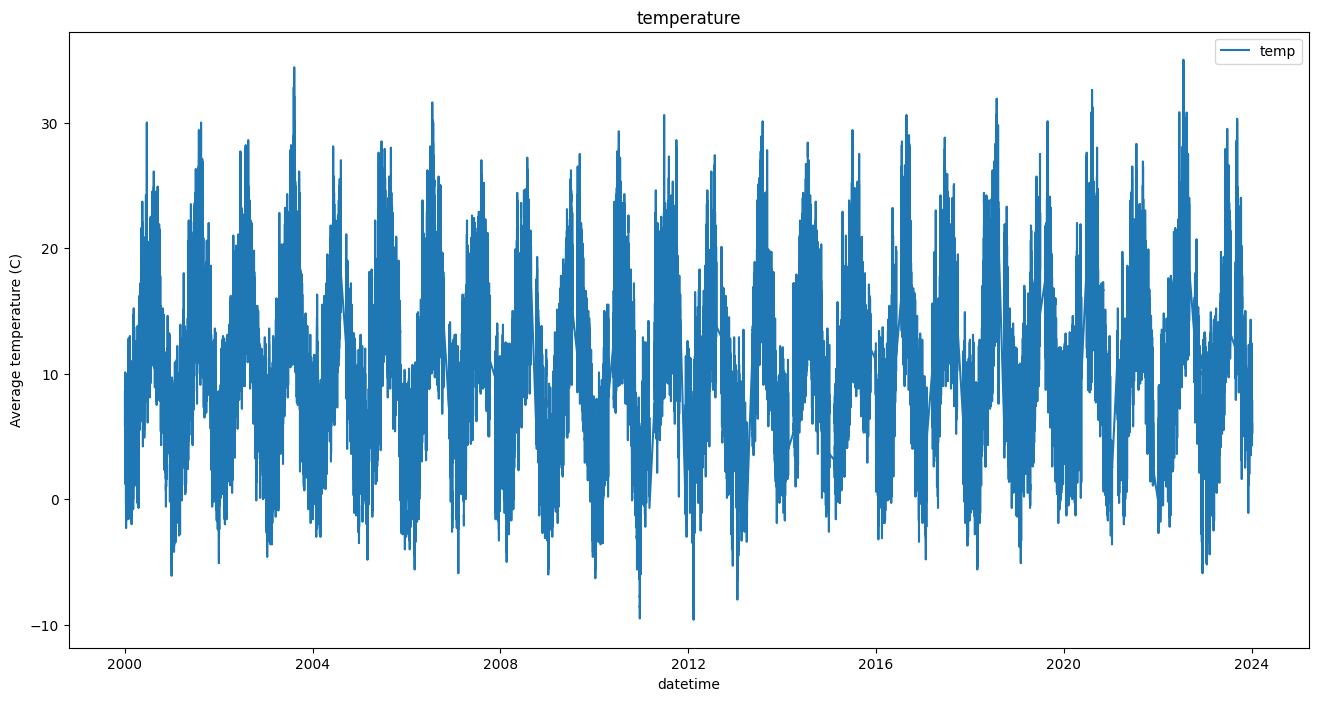

In [527]:
plt.figure(figsize=(16,8))
plt.plot(cd.index, cd['temp'],label='temp')
plt.xlabel('datetime')
plt.ylabel('Average temperature (C)')
plt.title('temperature')
plt.legend()

in this graph we can visualize the entire temperature over the years and we can see the patten over the years

##to remove all the duplicate values in data set

In [528]:
cd[cd.index.duplicated(keep=False)]

,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy
datetime,,,,,,,,,,,,,,,
2000-10-29 01:00:00,8.7,3.8,71.59,0.461,100.0,1.0,0.0,0.0,32.2,227.0,1001.1,NaN,NaN,NaN,NaN
2000-10-29 01:00:00,8.6,4.3,74.53,0.000,0.0,NaN,0.0,0.0,29.1,222.0,1001.5,NaN,NaN,NaN,NaN
2000-11-16 00:00:00,6.1,5.1,93.30,0.500,100.0,1.0,0.0,0.0,14.8,180.0,1005.1,100.0,NaN,NaN,NaN
2000-11-16 01:00:00,7.1,6.2,93.63,0.000,0.0,NaN,0.0,0.0,18.3,179.0,1004.2,100.0,NaN,NaN,NaN
2000-11-16 02:00:00,7.7,6.2,90.57,0.000,0.0,NaN,0.0,0.0,22.4,177.0,1003.5,100.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31 01:00:00,8.0,6.3,88.96,0.000,0.0,NaN,0.0,0.0,11.8,180.0,1001.8,25.4,0.0,0.0,0.0
2022-10-30 01:00:00,15.3,13.9,91.77,0.000,0.0,NaN,0.0,0.0,12.8,200.0,1014.2,100.0,0.0,0.0,0.0
2022-10-30 01:00:00,15.1,13.9,92.43,0.000,0.0,NaN,0.0,0.0,12.7,208.0,1014.3,100.0,0.0,0.0,0.0


In [529]:
cd = cd[~cd.index.duplicated(keep='first')]

In [530]:
cd[cd.index.duplicated(keep=False)]

,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy
datetime,,,,,,,,,,,,,,,


##checking if there is any missing rows in data frame

In [531]:
missing_rows = df.isnull().any(axis=1)
num_missing_rows = missing_rows.sum()
print("Number of missing rows:", num_missing_rows)

Number of missing rows: 498


in previous it seems like some missing data are there in data sheet

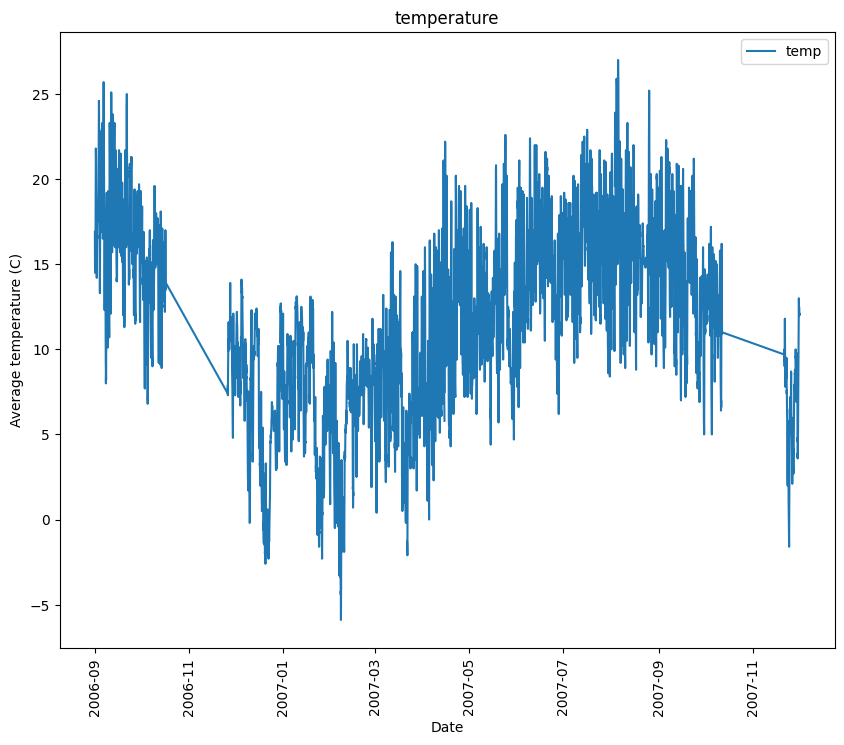

In [532]:
df_chunk = cd.loc['2006-09':'2007-11']

plt.figure(figsize=(10, 8))
plt.plot(df_chunk.index, df_chunk['temp'],label='temp')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.title('temperature')
_=plt.ylabel('Average temperature (C)')
plt.legend()

there are some missing data in the time series

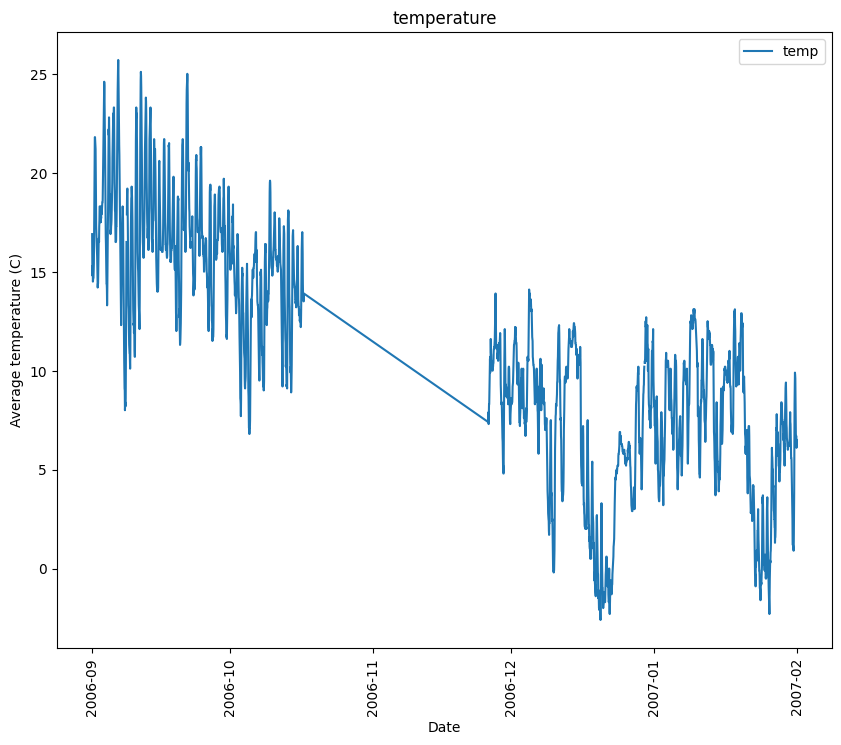

In [533]:
df_chunk = df_chunk.loc['2006-09':'2007-01']

plt.figure(figsize=(10, 8))
plt.plot(df_chunk.index, df_chunk['temp'],label='temp')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.title('temperature')
_=plt.ylabel('Average temperature (C)')
plt.legend()

expanding to visualize the data clearly

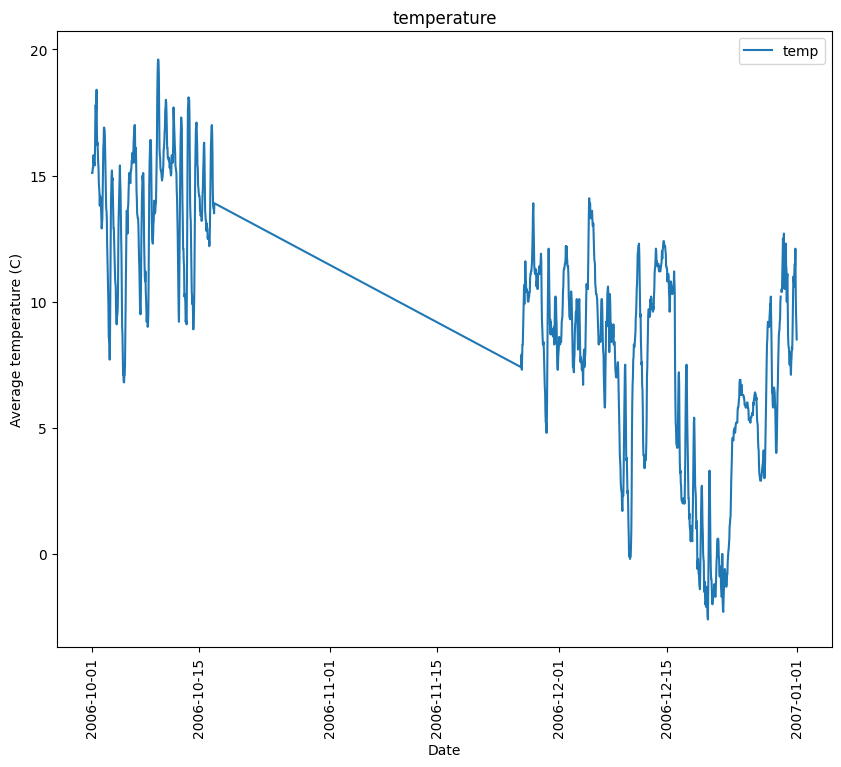

In [534]:
df_chunk = df_chunk.loc['2006-10':'2006-12']

plt.figure(figsize=(10, 8))
plt.plot(df_chunk.index, df_chunk['temp'],label='temp')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.title('temperature')
_=plt.ylabel('Average temperature (C)')
plt.legend()

Filling missing rows for chunk data

In [535]:
start_date = df_chunk.index.min()
end_date = df_chunk.index.max()
complete_index = pd.date_range(start=start_date, end=end_date, freq='H')
# Create a DataFrame with the complete index
complete_df = pd.DataFrame(index=complete_index, columns=['value'])
# Merge the complete DataFrame with your existing DataFrame
merged_df = complete_df.merge(df_chunk, how='left', left_index=True, right_index=True)
# Fill missing values with 0
merged_df['value'].fillna(0, inplace=True)
# Now, merged_df contains all the dates and times with missing values filled with 0

now we can see the missing data in the data frame

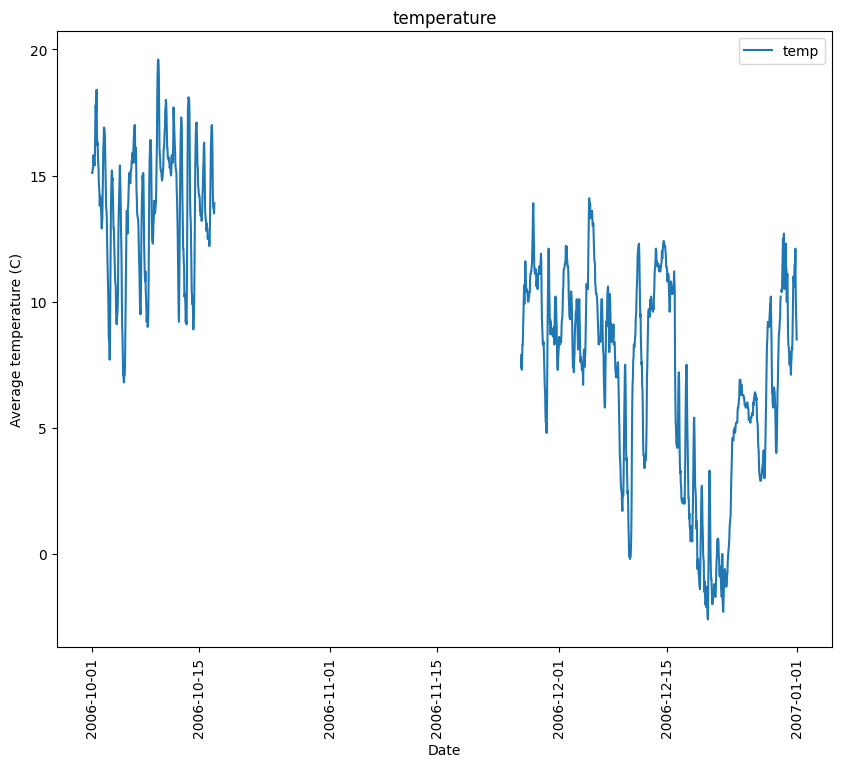

In [536]:
df_chunk = merged_df.loc['2006-10':'2006-12']  # since the date is an index, we can use it to filter our data

plt.figure(figsize=(10, 8))
plt.plot(df_chunk.index, df_chunk['temp'],label='temp')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.title('temperature')
_=plt.ylabel('Average temperature (C)')
plt.legend()

now we can able to clearly see the missing values in the data

In [537]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187979 entries, 2000-01-01 00:00:00 to 2024-01-05 09:00:00
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   temp              187562 non-null  float64
 1   dew               187556 non-null  float64
 2   humidity          187557 non-null  float64
 3   precip            187392 non-null  float64
 4   precipprob        187545 non-null  float64
 5   preciptype        19443 non-null   float64
 6   snow              186433 non-null  float64
 7   snowdepth         186385 non-null  float64
 8   windspeed         187582 non-null  float64
 9   winddir           187550 non-null  float64
 10  sealevelpressure  180420 non-null  float64
 11  cloudcover        184366 non-null  float64
 12  solarradiation    94883 non-null   float64
 13  uvindex           94886 non-null   float64
 14  solarenergy       94897 non-null   float64
dtypes: float64(15)
memory usage: 27.0 

In [538]:
cdd=cd.copy()

In [539]:
cdd.index

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 02:00:00', '2000-01-01 03:00:00',
               '2000-01-01 04:00:00', '2000-01-01 05:00:00',
               '2000-01-01 06:00:00', '2000-01-01 07:00:00',
               '2000-01-01 08:00:00', '2000-01-01 09:00:00',
               ...
               '2024-01-05 00:00:00', '2024-01-05 01:00:00',
               '2024-01-05 02:00:00', '2024-01-05 03:00:00',
               '2024-01-05 04:00:00', '2024-01-05 05:00:00',
               '2024-01-05 06:00:00', '2024-01-05 07:00:00',
               '2024-01-05 08:00:00', '2024-01-05 09:00:00'],
              dtype='datetime64[ns]', name='datetime', length=187979, freq=None)

##Filling missing rows for entire data set

adding all the missing date time in the entire data frame

In [540]:
start_date = cdd.index.min()
end_date = cdd.index.max()
complete_index = pd.date_range(start=start_date, end=end_date, freq='H')
complete_df = pd.DataFrame(index=complete_index, columns=['value'])
merged_df = complete_df.merge(cdd, how='left', left_index=True, right_index=True)
merged_df['value'].fillna(0, inplace=True)
print(merged_df)

                     value  temp  dew  humidity  precip  precipprob  \
2000-01-01 00:00:00      0   5.9  5.7     98.63     0.0         0.0   
2000-01-01 01:00:00      0   6.4  5.8     96.12     0.0         0.0   
2000-01-01 02:00:00      0   6.6  6.4     98.31     0.0         0.0   
2000-01-01 03:00:00      0   7.2  6.5     95.92     0.0         0.0   
2000-01-01 04:00:00      0   7.2  6.6     96.38     0.0         0.0   
...                    ...   ...  ...       ...     ...         ...   
2024-01-05 05:00:00      0   5.2  4.1     92.17     NaN         0.0   
2024-01-05 06:00:00      0   5.2  4.0     92.40     NaN         0.0   
2024-01-05 07:00:00      0   5.5  4.0     89.64     NaN         0.0   
2024-01-05 08:00:00      0   5.8  4.1     88.93     NaN         0.0   
2024-01-05 09:00:00      0   6.0  4.2     88.83     NaN         0.0   

                     preciptype  snow  snowdepth  windspeed  winddir  \
2000-01-01 00:00:00         NaN   NaN        NaN        9.4    210.0   
200

In [541]:
mdf=merged_df.copy()
mdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210490 entries, 2000-01-01 00:00:00 to 2024-01-05 09:00:00
Freq: H
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   value             210490 non-null  int64  
 1   temp              187562 non-null  float64
 2   dew               187556 non-null  float64
 3   humidity          187557 non-null  float64
 4   precip            187392 non-null  float64
 5   precipprob        187545 non-null  float64
 6   preciptype        19443 non-null   float64
 7   snow              186433 non-null  float64
 8   snowdepth         186385 non-null  float64
 9   windspeed         187582 non-null  float64
 10  winddir           187550 non-null  float64
 11  sealevelpressure  180420 non-null  float64
 12  cloudcover        184366 non-null  float64
 13  solarradiation    94883 non-null   float64
 14  uvindex           94886 non-null   float64
 15  solarenergy       94897 no

In [542]:
mdf = mdf.drop('value', axis=1)
#While adding missing dates by adding a column named value i added all the missing dates
#after adding all the missing dates now need to remove the added column

entire data frame after inserting missing dates

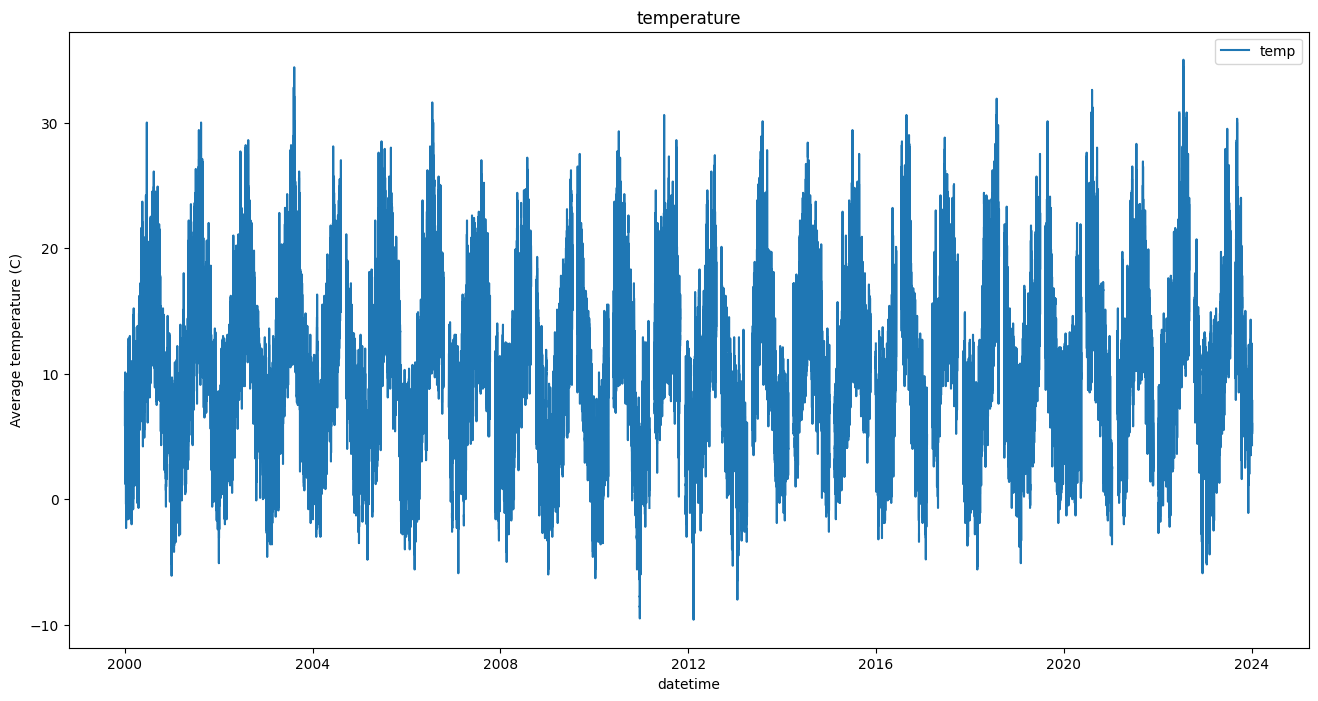

In [543]:
plt.figure(figsize=(16,8))
plt.plot(mdf.index, mdf['temp'],label='temp')
plt.xlabel('datetime')
plt.ylabel('Average temperature (C)')
plt.title('temperature')
plt.legend()

visulaizing entire temperature column after adding missing rows in data frame

plotting graph to understand the relation between the columns for solar energy

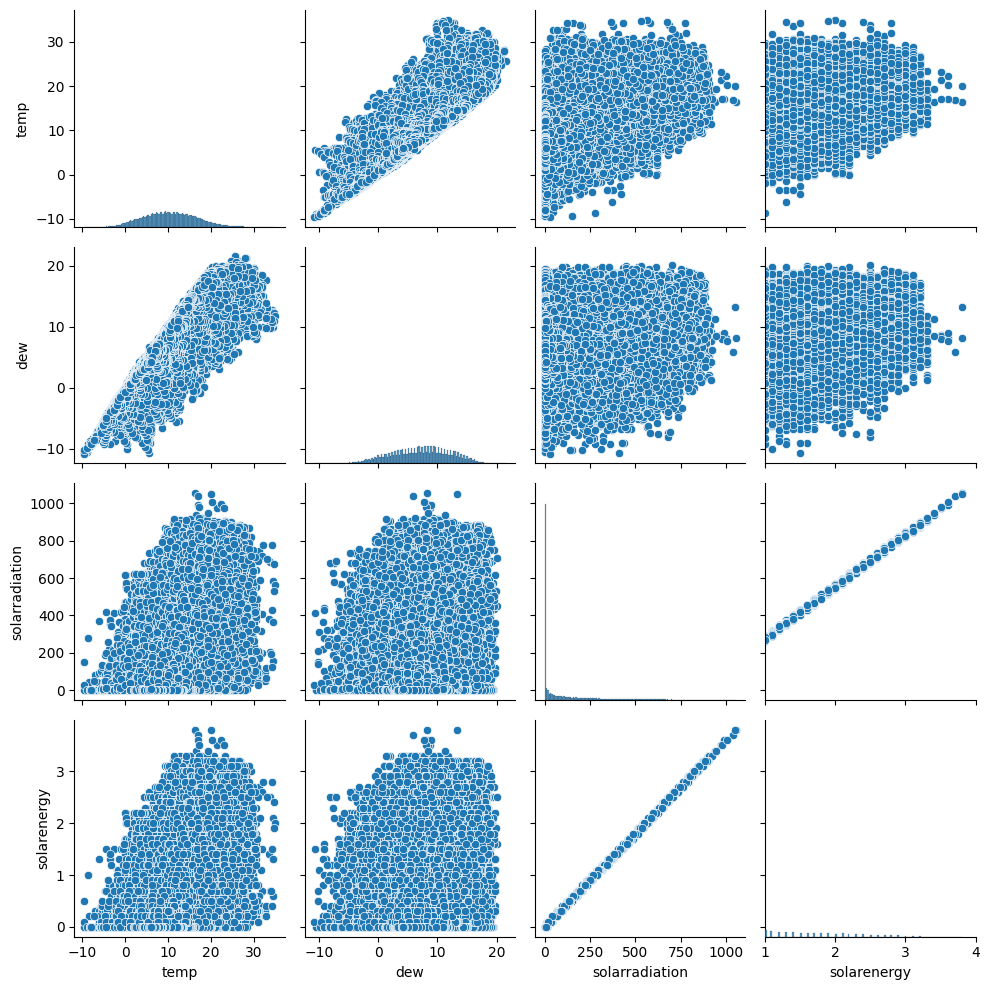

In [544]:
sns.pairplot(data=mdf[['temp', 'dew', 'solarradiation', 'solarenergy']])
_=plt.xlim(1, 4)
_=plt.tight_layout()

plotting graph to understand the relation between the columns for wind energy

<Axes: xlabel='windspeed', ylabel='winddir'>

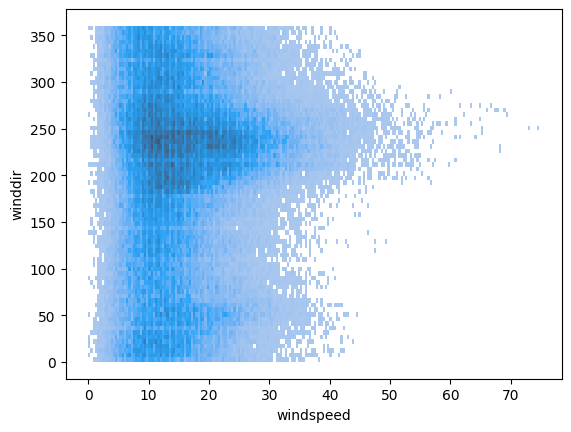

In [545]:
sns.histplot(data=mdf, x='windspeed',y='winddir')

In [546]:
mdf.head()

,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy
2000-01-01 00:00:00,5.9,5.7,98.63,0.0,0.0,NaN,NaN,NaN,9.4,210.0,1020.6,NaN,NaN,NaN,NaN
2000-01-01 01:00:00,6.4,5.8,96.12,0.0,0.0,NaN,NaN,NaN,15.1,233.0,1020.4,100.0,NaN,NaN,NaN
2000-01-01 02:00:00,6.6,6.4,98.31,0.0,0.0,NaN,NaN,NaN,13.9,238.0,1020.5,100.0,NaN,NaN,NaN
2000-01-01 03:00:00,7.2,6.5,95.92,0.0,0.0,NaN,NaN,NaN,14.1,232.0,1020.5,100.0,NaN,NaN,NaN
2000-01-01 04:00:00,7.2,6.6,96.38,0.0,0.0,NaN,NaN,NaN,14.3,242.0,1020.4,100.0,NaN,NaN,NaN


In [547]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210490 entries, 2000-01-01 00:00:00 to 2024-01-05 09:00:00
Freq: H
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   temp              187562 non-null  float64
 1   dew               187556 non-null  float64
 2   humidity          187557 non-null  float64
 3   precip            187392 non-null  float64
 4   precipprob        187545 non-null  float64
 5   preciptype        19443 non-null   float64
 6   snow              186433 non-null  float64
 7   snowdepth         186385 non-null  float64
 8   windspeed         187582 non-null  float64
 9   winddir           187550 non-null  float64
 10  sealevelpressure  180420 non-null  float64
 11  cloudcover        184366 non-null  float64
 12  solarradiation    94883 non-null   float64
 13  uvindex           94886 non-null   float64
 14  solarenergy       94897 non-null   float64
dtypes: float64(15)
memory usag

#Training testing validation splitting

In [548]:
total_samples = len(mdf)
train_size = int(total_samples * 0.7)  # 70% for training
validation_size = int(total_samples * 0.15)   # 15% for validation
test_size = total_samples - train_size - validation_size  # Remaining for testing

train = mdf.iloc[:train_size]
validation_start_index = train_size
validation_end_index = validation_start_index + validation_size
validation = mdf.iloc[validation_start_index:validation_end_index]

test_start_index = validation_end_index
test_end_index = test_start_index + test_size
test = mdf.iloc[test_start_index:test_end_index]

# Displaying start and end dates of training, testing, and validation sets
print('Start and end of training set:\t', train.index.min(), train.index.max())
print('Start and end of validation set:\t', validation.index.min(), validation.index.max())
print('Start and end of test set:\t', test.index.min(), test.index.max())


Start and end of training set:	 2000-01-01 00:00:00 2016-10-22 06:00:00
Start and end of validation set:	 2016-10-22 07:00:00 2020-05-29 19:00:00
Start and end of test set:	 2020-05-29 20:00:00 2024-01-05 09:00:00


In [549]:
test

,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy
2020-05-29 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-29 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-29 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-29 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 05:00:00,5.2,4.1,92.17,NaN,0.0,NaN,NaN,NaN,27.6,325.0,993.2,100.0,0.0,0.0,0.0
2024-01-05 06:00:00,5.2,4.0,92.40,NaN,0.0,NaN,NaN,NaN,29.6,317.0,993.5,96.6,0.0,0.0,0.0
2024-01-05 07:00:00,5.5,4.0,89.64,NaN,0.0,NaN,NaN,NaN,28.1,308.0,994.5,95.8,0.0,0.0,0.0
2024-01-05 08:00:00,5.8,4.1,88.93,NaN,0.0,NaN,NaN,NaN,27.9,313.0,996.1,91.8,0.0,0.0,0.0


#Preprocessing

##Replacing all the null values using linear method

In [550]:
def preprocessing(data):
  data['temp'] = data['temp'].interpolate(method='linear')
  data['dew'] = data['dew'].interpolate(method='linear')
  data['humidity'] = data['humidity'].interpolate(method='linear')
  data['precip'].fillna(0, inplace=True)  # can't use interpolate method because it is categorical data
  data['precipprob'].fillna(0, inplace=True)
  data['preciptype'].fillna(0, inplace=True)
  data['snow'].fillna(0, inplace=True)  # can't use interpolate method because it is categorical data
  data['snowdepth'].fillna(0, inplace=True)
  data['windspeed'].fillna(0, inplace=True)
  data['winddir'] = data['winddir'].interpolate(method='linear')
  data['sealevelpressure'] = data['sealevelpressure'].interpolate(method='linear')
  data['cloudcover'].fillna(0, inplace=True)
  data['solarradiation'].fillna(0, inplace=True)
  data['uvindex'].fillna(0, inplace=True)
  data['solarenergy'].fillna(0, inplace=True)
  return data

In [551]:
train=preprocessing(train)
validation=preprocessing(validation)
test=preprocessing(test)

In [552]:
train.isnull().sum()

temp                0
dew                 0
humidity            0
precip              0
precipprob          0
preciptype          0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
solarradiation      0
uvindex             0
solarenergy         0
dtype: int64

In [553]:
validation.isnull().sum()

temp                0
dew                 0
humidity            0
precip              0
precipprob          0
preciptype          0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
solarradiation      0
uvindex             0
solarenergy         0
dtype: int64

In [554]:
test.isnull().sum()

temp                628
dew                 628
humidity            628
precip                0
precipprob            0
preciptype            0
snow                  0
snowdepth             0
windspeed             0
winddir             628
sealevelpressure    628
cloudcover            0
solarradiation        0
uvindex               0
solarenergy           0
dtype: int64

In [555]:
test['temp'] = test['temp'].interpolate(method='linear')
test['dew'] = test['dew'].interpolate(method='linear')
test['humidity'] = test['humidity'].interpolate(method='linear')
test['winddir'] = test['winddir'].interpolate(method='linear')
test['sealevelpressure'] = test['sealevelpressure'].interpolate(method='linear')

In [556]:
test['temp'].fillna(method='ffill', inplace=True)
test['dew'].fillna(method='bfill', inplace=True)
test['humidity'].fillna(test['humidity'].mean(), inplace=True)
test['winddir'].fillna(method='ffill', inplace=True)
test['sealevelpressure'].fillna(method='bfill', inplace=True)

# Checking again for null values
null_values = test.isnull().sum()
print("Null values after imputation:")
print(null_values)


Null values after imputation:
temp                628
dew                   0
humidity              0
precip                0
precipprob            0
preciptype            0
snow                  0
snowdepth             0
windspeed             0
winddir             628
sealevelpressure      0
cloudcover            0
solarradiation        0
uvindex               0
solarenergy           0
dtype: int64


In [557]:
test['temp'].fillna(test['temp'].mean(), inplace=True)
most_common_winddir = test['winddir'].mode()[0]
test['winddir'].fillna(most_common_winddir, inplace=True)
null_values = test.isnull().sum()
print("Null values after imputation:")
print(null_values)

Null values after imputation:
temp                0
dew                 0
humidity            0
precip              0
precipprob          0
preciptype          0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
solarradiation      0
uvindex             0
solarenergy         0
dtype: int64


all the null values are replaced

In [558]:
test.isnull().sum()

temp                0
dew                 0
humidity            0
precip              0
precipprob          0
preciptype          0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
solarradiation      0
uvindex             0
solarenergy         0
dtype: int64

after replacing all the null values in the data frame plotting graph for the entire data frame

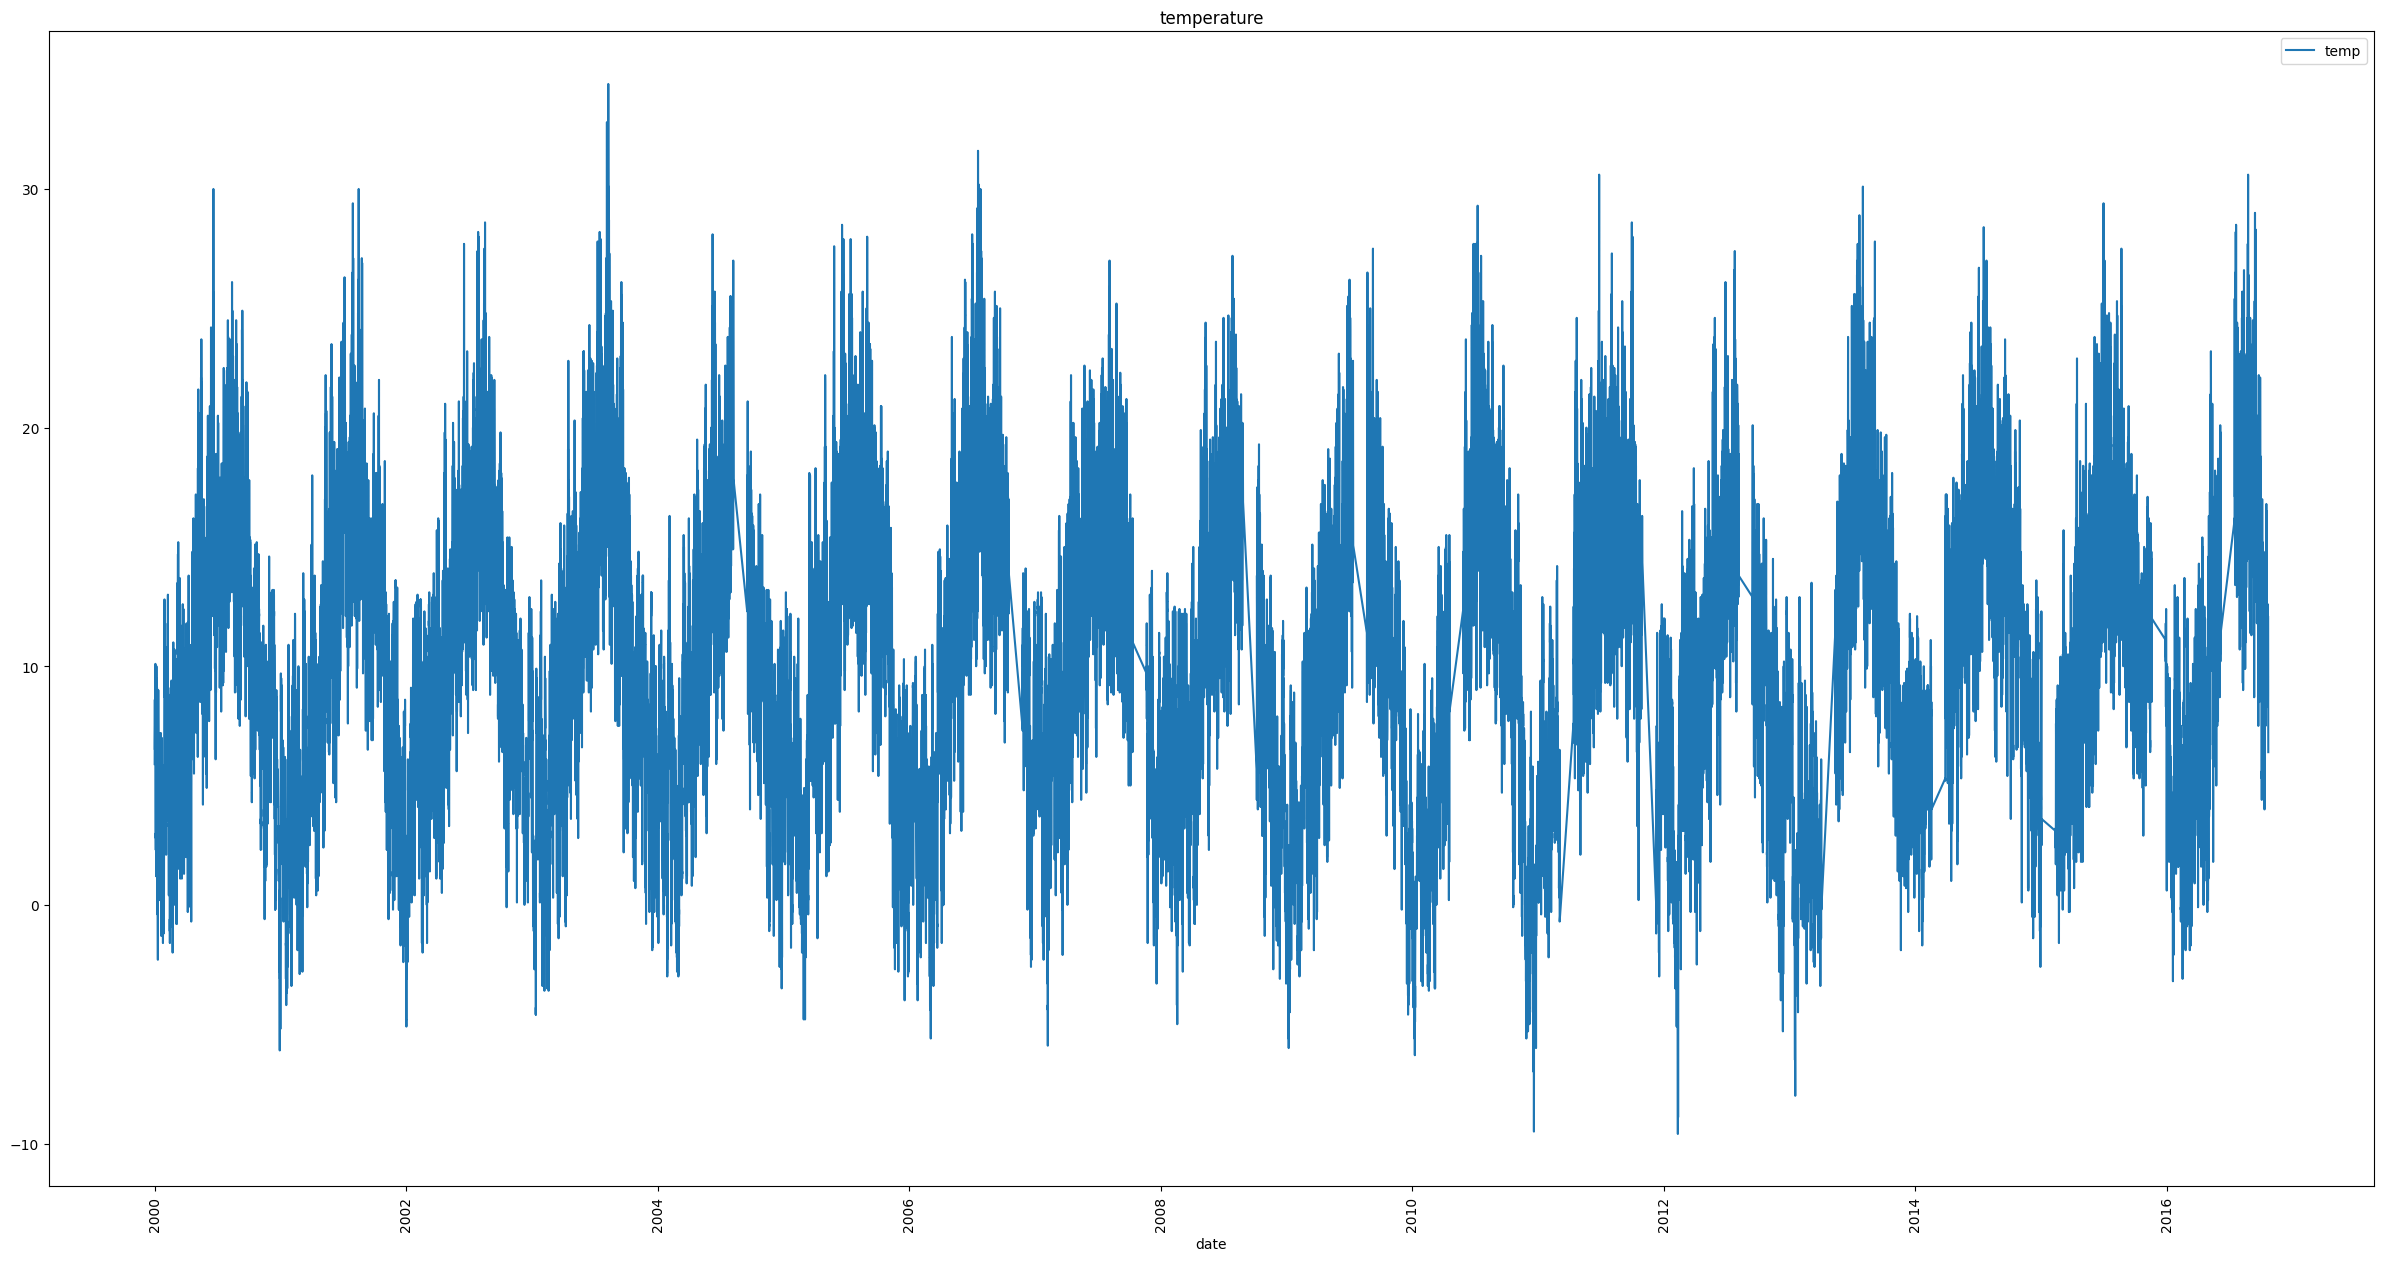

In [559]:
plt.figure(figsize=(30, 15))
plt.plot(train.index, train['temp'],label='temp')
plt.xticks(rotation=90)
plt.xlabel('date')
plt.title('temperature')
plt.legend()

##plotting the graph after replacing all the null values

Temperature method is linear

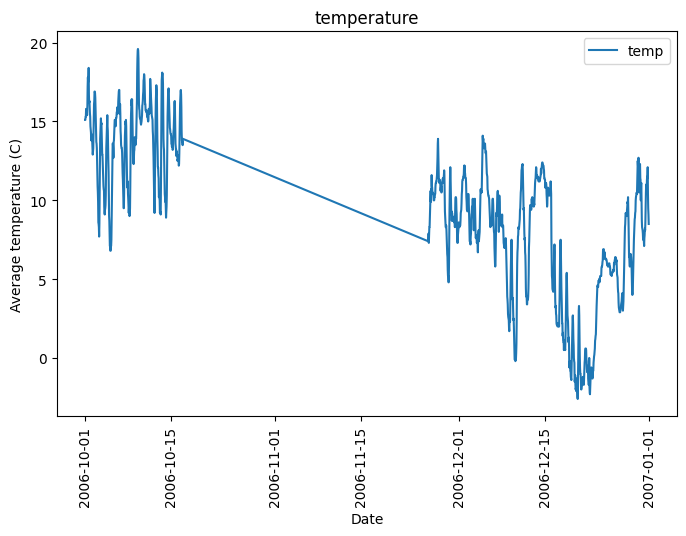

In [560]:
df_chunk = train.loc['2006-10':'2006-12']
plt.figure(figsize=(8, 5))
plt.plot(df_chunk.index, df_chunk['temp'],label='temp')
plt.xticks(rotation=90)
plt.xlabel('Date')
_=plt.ylabel('Average temperature (C)')
plt.title('temperature')
plt.legend()

dew method is linear

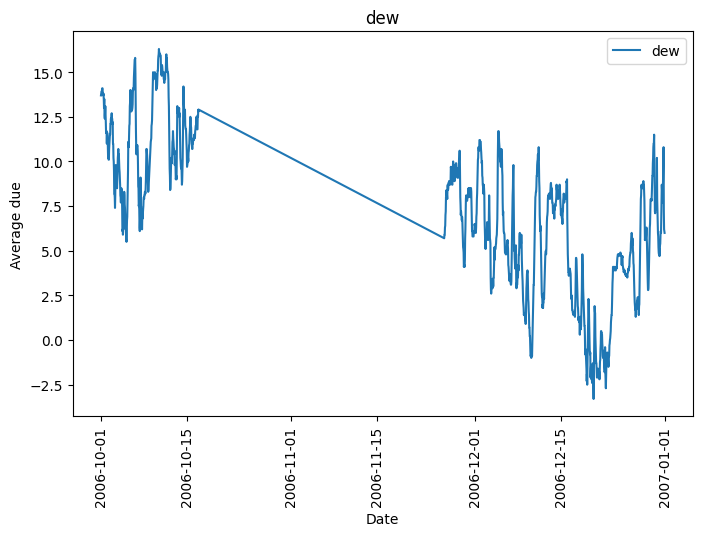

In [561]:
df_chunk = train.loc['2006-10':'2006-12']
plt.figure(figsize=(8, 5))
plt.plot(df_chunk.index, df_chunk['dew'],label='dew')
plt.xticks(rotation=90)
plt.xlabel('Date')
_=plt.ylabel('Average due')
plt.title('dew')
plt.legend()

humidity method is linear

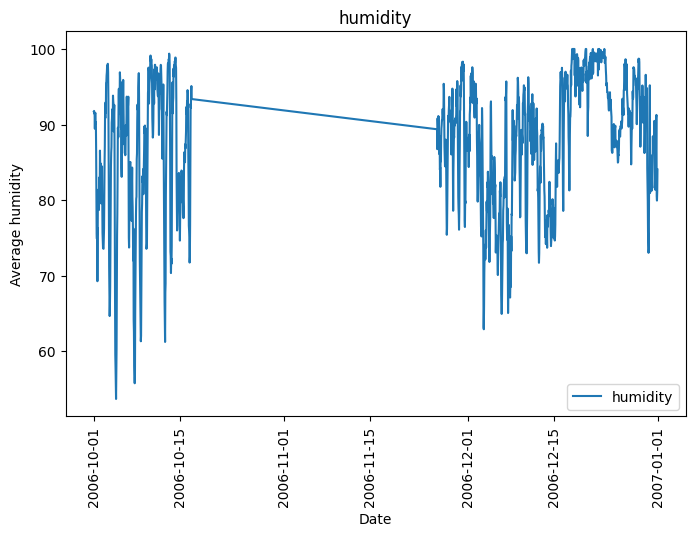

In [562]:
df_chunk = train.loc['2006-10':'2006-12']
plt.figure(figsize=(8, 5))
plt.plot(df_chunk.index, df_chunk['humidity'],label='humidity')
plt.xticks(rotation=90)
plt.xlabel('Date')
_=plt.ylabel('Average humidity')
plt.title('humidity')
plt.legend()

winddir (wind direction) method is linear

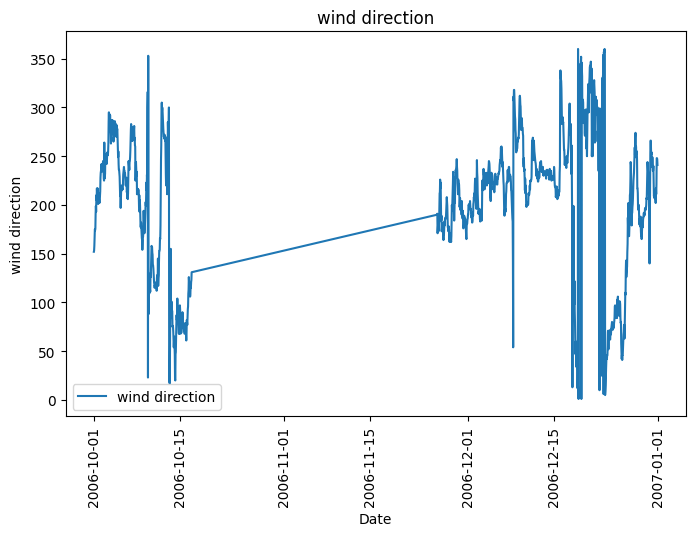

In [563]:
df_chunk = train.loc['2006-10':'2006-12']
plt.figure(figsize=(8, 5))
plt.plot(df_chunk.index, df_chunk['winddir'],label='wind direction')
plt.xticks(rotation=90)
plt.xlabel('Date')
_=plt.ylabel('wind direction')
plt.title('wind direction')
plt.legend()

sealevelpressure method is linear

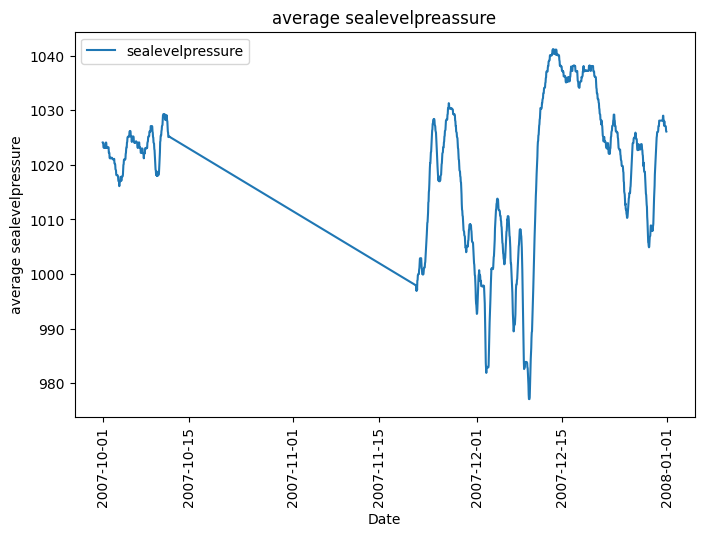

In [564]:
df_chunk = train.loc['2007-10':'2007-12']
plt.figure(figsize=(8, 5))
plt.plot(df_chunk.index, df_chunk['sealevelpressure'],label='sealevelpressure')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.title('average sealevelpreassure')
_=plt.ylabel('average sealevelpressure')
plt.legend()

#Seasonal-Trend decomposition

In [565]:
cdf=train

In [566]:

data_ds = cdf['temp'].resample('M').mean().ffill().to_frame()  # one value per month
data_ds

,temp
2000-01-31,4.740457
2000-02-29,6.054813
2000-03-31,7.101546
2000-04-30,8.143889
2000-05-31,12.065121
...,...
2016-06-30,12.747778
2016-07-31,17.293010
2016-08-31,17.997782
2016-09-30,17.175278


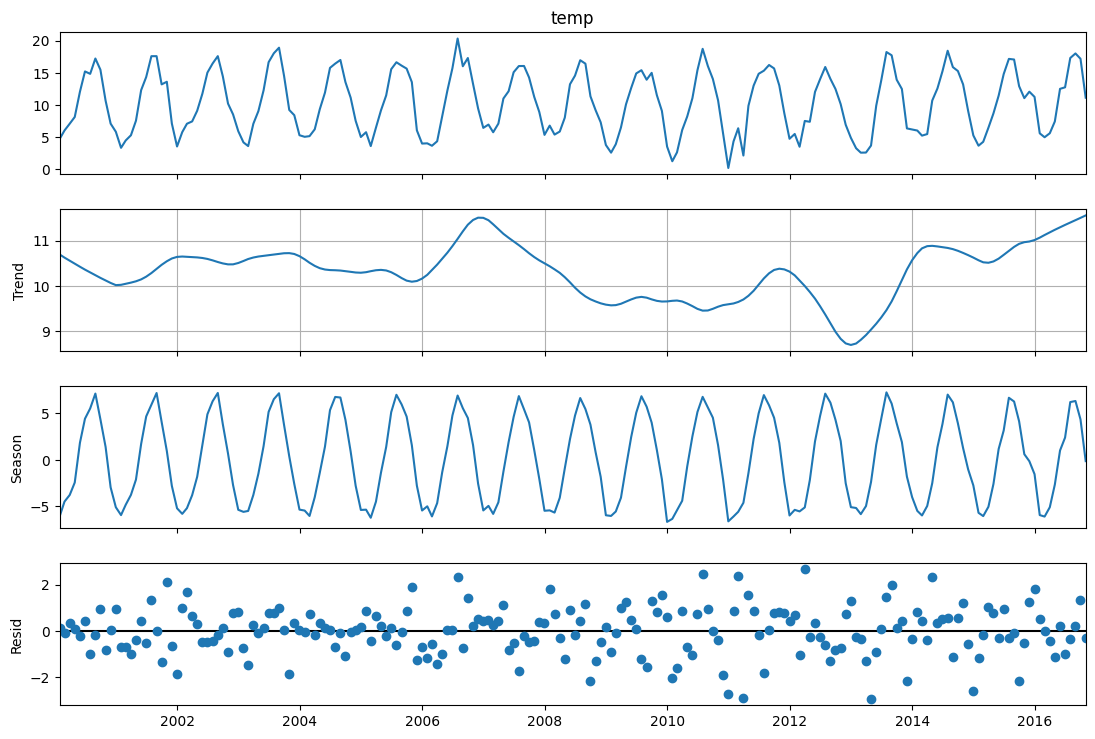

In [567]:
decomposition = STL(data_ds['temp']).fit()
fig = decomposition.plot()
fig.set_size_inches(12,8)
fig.axes[1].grid()

#Assumptions and Research

In Essex there are 170 wind turbines are there. In Essex 14 districts are there.  If I divide 170/14 on a average in colchester 13 wind turbines are there.

Reference: https://windsorstar.com/business/33698#:~:text=Combined%20with%20seven%20other%20wind,than%20350%20megawatts%20of%20electricity

##to calculate the wind power

In [568]:
air_density = 1.225  # kg/m^3
rotor_swept_area = 100  # m^2
number_of_turbine=13
#calculating wind power using this formula Wind speed meter per second but it is kilometer per second
#0.50*air density×area swept out by the blades×wind speed 3×efficiency
def windspeed(data):
  data['windpower']= 0.5 * air_density * rotor_swept_area * (((mdf['windspeed'] * 1000 / 3600) / 3.6) ** 3) * number_of_turbine
  return data
train=windspeed(train)
validation=windspeed(validation)
test=windspeed(test)
validation

,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy,windpower
2016-10-22 07:00:00,5.90,5.6,97.92,0.075,100.0,1.0,0.0,0.0,9.9,333.0,1016.60,73.8,0.2,0.0,0.0,354.927806
2016-10-22 08:00:00,6.10,5.9,98.83,0.000,0.0,0.0,0.0,0.0,10.6,343.0,1016.65,57.6,41.1,0.0,0.1,435.664363
2016-10-22 09:00:00,7.30,7.0,98.21,0.000,0.0,0.0,0.0,0.0,10.7,340.0,1016.70,73.1,141.7,1.0,0.5,448.111174
2016-10-22 10:00:00,9.10,8.2,94.44,0.000,0.0,0.0,0.0,0.0,13.3,358.0,1016.60,20.0,279.9,3.0,1.0,860.576264
2016-10-22 11:00:00,10.65,9.1,86.70,0.000,0.0,0.0,0.0,0.0,13.3,6.0,1016.50,10.0,382.8,4.0,1.4,860.576264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-29 15:00:00,9.60,4.0,68.07,0.000,0.0,0.0,0.0,0.0,0.0,286.0,1024.10,0.0,0.0,0.0,0.0,0.000000
2020-05-29 16:00:00,9.60,4.0,68.07,0.000,0.0,0.0,0.0,0.0,0.0,286.0,1024.10,0.0,0.0,0.0,0.0,0.000000
2020-05-29 17:00:00,9.60,4.0,68.07,0.000,0.0,0.0,0.0,0.0,0.0,286.0,1024.10,0.0,0.0,0.0,0.0,0.000000
2020-05-29 18:00:00,9.60,4.0,68.07,0.000,0.0,0.0,0.0,0.0,0.0,286.0,1024.10,0.0,0.0,0.0,0.0,0.000000


plot graph for wind power and see the visual

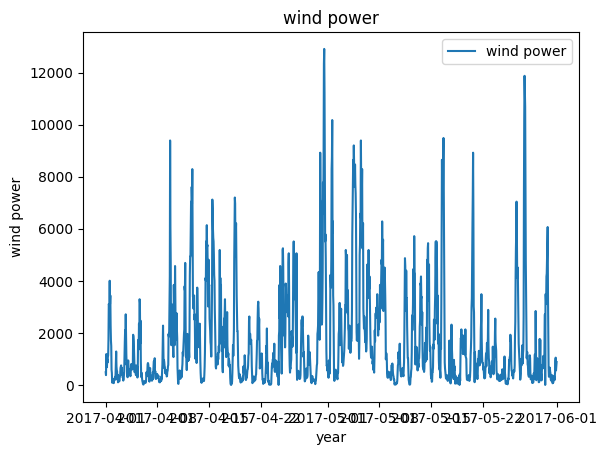

In [569]:
df_chunk = validation.loc['2017-04':'2017-05']
plt.plot(df_chunk['windpower'],label='wind power')
plt.xlabel('year')
plt.ylabel('wind power')
plt.title('wind power')
plt.legend()
plt.show()

##to calculate the solar power

In colchester on average 7280 homes have solar panel.

Reference: https://www.sunsave.energy/solar-panels-advice/uk-places/essex

In [570]:
Area_of_solar_panel=20
Effeciency= 15
number_of_solar_pannel=7280
#calculating solar power using this formula

#its already in kilowhatts per hour
def solarpower(data):
  #solar energy * Area of solar panel*effenciey of solar panel by obsorving the current
  data['solarpower']= data['solarenergy']*20*0.15 * number_of_solar_pannel
  return data
train=solarpower(train)
validation=solarpower(validation)
test=solarpower(test)

In [571]:
# for i in train['solarpower']:
#   print(i)

In [572]:
train

,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy,windpower,solarpower
2000-01-01 00:00:00,5.9,5.7,98.63,0.0,0.0,0.0,0.0,0.0,9.4,210.0,1020.6,0.0,0.0,0.0,0.0,303.821149,0.0
2000-01-01 01:00:00,6.4,5.8,96.12,0.0,0.0,0.0,0.0,0.0,15.1,233.0,1020.4,100.0,0.0,0.0,0.0,1259.404621,0.0
2000-01-01 02:00:00,6.6,6.4,98.31,0.0,0.0,0.0,0.0,0.0,13.9,238.0,1020.5,100.0,0.0,0.0,0.0,982.378483,0.0
2000-01-01 03:00:00,7.2,6.5,95.92,0.0,0.0,0.0,0.0,0.0,14.1,232.0,1020.5,100.0,0.0,0.0,0.0,1025.396377,0.0
2000-01-01 04:00:00,7.2,6.6,96.38,0.0,0.0,0.0,0.0,0.0,14.3,242.0,1020.4,100.0,0.0,0.0,0.0,1069.652112,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-22 02:00:00,7.5,7.3,98.39,0.0,0.0,0.0,0.0,0.0,10.3,345.0,1017.5,78.4,0.0,0.0,0.0,399.711014,0.0
2016-10-22 03:00:00,7.1,6.9,98.61,0.0,0.0,0.0,0.0,0.0,9.2,333.0,1017.4,53.9,0.0,0.0,0.0,284.837997,0.0
2016-10-22 04:00:00,7.3,6.9,96.85,0.0,0.0,0.0,0.0,0.0,10.8,338.0,1017.0,46.0,0.0,0.0,0.0,460.792824,0.0
2016-10-22 05:00:00,6.8,6.4,97.03,0.0,0.0,0.0,0.0,0.0,11.8,345.0,1016.7,56.3,0.0,0.0,0.0,601.008290,0.0


plot graph for solar power and see the visual

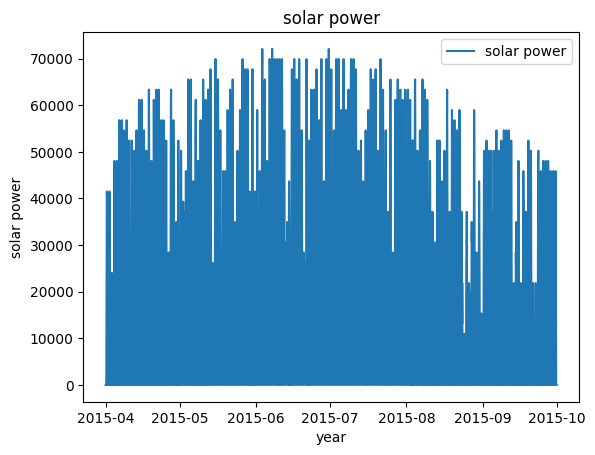

In [573]:
df_chunk = train.loc['2015-04':'2015-09']
plt.plot(df_chunk['solarpower'],label='solar power')
plt.xlabel('year')
plt.ylabel('solar power')
plt.title('solar power')
plt.legend()
plt.show()

now we had identified wind power and solar power

#Threshold

##How much electricity had been consumed by the colchester

For the year 2019, the electricity consumption was:
* Scope 2: 895.05 tonnes of CO2e
* Scope 3 (Electricity transmission & distribution losses): 75.99 tonnes of CO2e
* Total electricity consumption for 2019: 895.05 + 75.99 = 971.04 tonnes of CO2e.  Which is 1942080 kilowatts
This had mentioned in https://www.colchester.gov.uk/sustainability/our-emissions/?id=&page=emissions--monitoring website. This is a government website.

#Surplus energy

now we are going to work only on year 2019

In [574]:
# Select data for the year 2019
data_2019 = validation.loc['2019']

# Display the chunk of data for the year 2019
data_2019

,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy,windpower,solarpower
2019-01-01 00:00:00,8.3,5.2,80.70,0.0,0.0,0.0,0.0,0.0,17.3,282.0,1033.3,100.0,0.0,0.0,0.0,1893.968493,0.0
2019-01-01 01:00:00,8.2,5.0,80.49,0.0,0.0,0.0,0.0,0.0,17.3,294.0,1033.2,100.0,0.0,0.0,0.0,1893.968493,0.0
2019-01-01 02:00:00,7.8,4.6,79.88,0.0,0.0,0.0,0.0,0.0,17.2,291.0,1033.0,85.3,0.0,0.0,0.0,1861.314589,0.0
2019-01-01 03:00:00,7.4,4.6,82.26,0.0,0.0,0.0,0.0,0.0,15.9,283.0,1033.0,76.5,0.0,0.0,0.0,1470.367225,0.0
2019-01-01 04:00:00,7.0,4.4,83.54,0.0,0.0,0.0,0.0,0.0,16.1,276.0,1032.8,48.0,0.0,0.0,0.0,1526.553639,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,6.2,5.8,97.05,0.0,0.0,0.0,0.0,0.0,12.4,104.0,1032.9,86.0,0.0,0.0,0.0,697.428188,0.0
2019-12-31 20:00:00,6.6,6.0,95.85,0.0,0.0,0.0,0.0,0.0,15.0,108.5,1032.8,96.7,0.0,0.0,0.0,1234.548676,0.0
2019-12-31 21:00:00,6.7,6.0,95.74,0.0,0.0,0.0,0.0,0.0,14.2,113.0,1032.5,79.8,0.0,0.0,0.0,1047.368417,0.0
2019-12-31 22:00:00,6.7,5.7,93.48,0.0,0.0,0.0,0.0,0.0,15.7,116.0,1032.3,91.7,0.0,0.0,0.0,1415.576675,0.0


In [575]:
# Total solar power and wind power for the year 2019
total_solar_power = data_2019['solarpower'].sum()
total_wind_power = data_2019['windpower'].sum()
# Display the total solar power and wind power
print("Total solar power for the year 2019:", total_solar_power)
print("Total wind power for the year 2019:", total_wind_power)

Total solar power for the year 2019: 55528200.0
Total wind power for the year 2019: 20464056.692884013


In [576]:
# Total electricity consumption in tonnes of CO2e for 2019
total_electricity_consumption = 1942080  # Kilowatts. this is the threshold

# Compare total solar power and wind power with total electricity consumption
if total_solar_power > total_electricity_consumption:
    print("Solar power generated more electricity than consumed in 2019.")
elif total_wind_power > total_electricity_consumption:
    print("Wind power generated more electricity than consumed in 2019.")
else:
    print("Neither solar nor wind power generated more electricity than consumed in 2019.")


Solar power generated more electricity than consumed in 2019.


##Finding surplus energy.

In [577]:
total_energy_consumed = 1942080
surplus_energy = (total_solar_power + total_wind_power)-total_energy_consumed
print('surplus energy is ',surplus_energy)

surplus energy is  74050176.69288401


saving final unified dataset

In [578]:
train.to_csv('/content/drive/MyDrive/university of essex/data science/ds_assignment/unified dataset/train.csv')
validation.to_csv('/content/drive/MyDrive/university of essex/data science/ds_assignment/unified dataset/validation.csv')
test.to_csv('/content/drive/MyDrive/university of essex/data science/ds_assignment/unified dataset/test.csv')
